A10 (Eigenfunction errors): [6.28379092e-07 2.70459142e-06 1.38040154e-05 1.05642873e-04
 5.30151269e-04]
A11 (Eigenvalue errors): [0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
A12 (Eigenfunction errors): [4.33774502e-07 3.49873513e-06 2.88655932e-05 2.61453437e-04
 1.80936231e-03]
A13 (Eigenvalue errors): [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


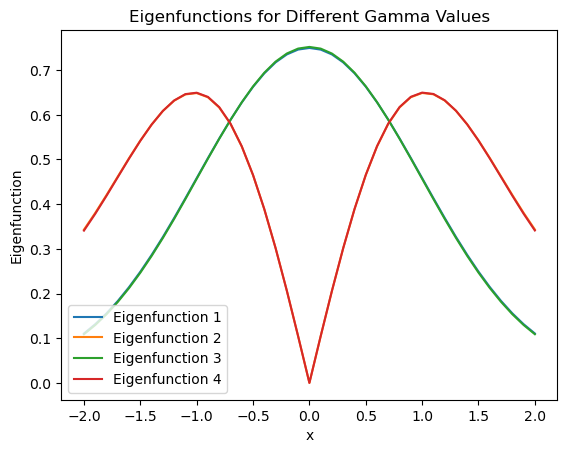

Eigenvalues (epsilon): [1.01294346 2.92140007 0.97404366 2.8931263 ]
Eigenfunctions matrix:
[[1.10632358e-01 3.42995527e-01 1.09045279e-01 3.40832346e-01]
 [1.31425407e-01 3.80307963e-01 1.29684652e-01 3.78398850e-01]
 [1.55620693e-01 4.20317402e-01 1.53728876e-01 4.18702552e-01]
 [1.83285194e-01 4.61688123e-01 1.81256618e-01 4.60406686e-01]
 [2.14394976e-01 5.02884145e-01 2.12256631e-01 5.01966770e-01]
 [2.48815364e-01 5.42261602e-01 2.46607161e-01 5.41725385e-01]
 [2.86300943e-01 5.78068745e-01 2.84075948e-01 5.77912184e-01]
 [3.26495557e-01 6.08445939e-01 3.24320228e-01 6.08643887e-01]
 [3.69024982e-01 6.31547784e-01 3.66983044e-01 6.32045213e-01]
 [4.13247258e-01 6.45555202e-01 4.11408369e-01 6.46263364e-01]
 [4.58248952e-01 6.48574178e-01 4.56693970e-01 6.49395945e-01]
 [5.03110837e-01 6.39164199e-01 5.01923165e-01 6.40004577e-01]
 [5.46908781e-01 6.16356415e-01 5.46164881e-01 6.17131483e-01]
 [5.88713743e-01 5.79653636e-01 5.88473648e-01 5.80299481e-01]
 [6.27591773e-01 5.2903033

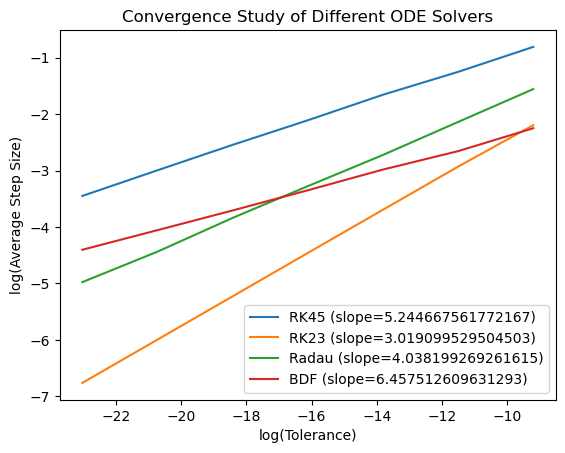

Convergence slopes for each method:
RK45: 5.244667561772167
RK23: 3.019099529504503
Radau: 4.038199269261615
BDF: 6.457512609631293


In [1]:
# Josh Kreutz
# 11/6/2024 
# AMATH 581 HW #3

import numpy as np
from scipy.integrate import solve_ivp, simpson
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import math

# Part A - Eigenfunction and Eigenvalue Calculation

def shoot2(x, y, epsilon):
    return [y[1], (np.square(x) - epsilon) * y[0]]

tol = 1e-4  
A1 = []
A2 = []

epsilon_start = 0.1 
L = 4
xshoot = np.arange(-L, L + 0.1, 0.1)

# Compute eigenfunctions and eigenvalues
for modes in range(1, 6):  
    epsilon = epsilon_start  
    depsilon = 0.2  
    for _ in range(1000):  
        x0 = [1, np.sqrt(L**2 - epsilon)]
        
        sol = solve_ivp(shoot2, [xshoot[0], xshoot[-1]], x0, t_eval=xshoot, args=(epsilon,))
      
        if abs(sol.y[0, -1] * np.sqrt(L**2 - epsilon) + sol.y[1, -1]) < tol: 
            break  

        if (-1) ** (modes + 1) * (sol.y[0, -1] * np.sqrt(L**2 - epsilon) + sol.y[1, -1]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 0.2  

    # Normalize eigenfunction
    norm = np.trapz(sol.y[0]**2, xshoot)
    normalized_eigenfunction = sol.y[0] / np.sqrt(norm)
    
    A1.append(np.abs(normalized_eigenfunction))
    A2.append(epsilon)

A1 = np.array(A1).T
A2 = np.array(A2)


# Part B

import numpy as np
from numpy import linalg
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Define constants
L = 4.0  # Boundary for the solution (large enough to approximate infinity)
dx = 0.1  # Step size
xspan = np.arange(-L, L + dx, dx)  # x from -L to L inclusive
N = len(xspan) - 2  # Number of points
K = 1  # Given constant (harmonic oscillator potential constant)

# Discretize the second derivative using a finite difference method (central differencing)
D2 = np.zeros((N, N))  # Initialize the second derivative matrix

# Fill D2 for interior points (central differencing)
for i in range(1, N-1):
    D2[i, i-1] = 1
    D2[i, i] = -2
    D2[i, i+1] = 1 

# Fill in remaining points
D2[0, 0] = -2
D2[0, 1] = 1
D2[N-1, N-1] = -2
D2[N-1, N-2] = 1 

# Boundary conditions: forward differencing at the first point, backward differencing at the last point
# Forward differencing at the first point
D2[0, 0] += 4/3
D2[0, 1] -= 1/3

# Backward differencing at the last point
D2[N-1, N-2] -= 1/3
D2[N-1, N-1] += 4/3

# Potential energy term: V(x) = K * x^2 (Harmonic oscillator potential)
V = np.diag(dx**2 * K * xspan[1:80] ** 2)

# Hamiltonian matrix: H = d^2/dx^2  Kx^2
H = D2 - V

# Solve the eigenvalue problem: H * phi = epsilon * phi
eigenvalues, eigenfunctions = eigs(-H / dx**2, k=5, which="SM")

# Sort eigenfunctions
Vsort = eigenfunctions

# Initialize end points
top_corner = (4/3)*Vsort[0,:] - (1/3)*Vsort[1,:]
bottom_corner = (4/3)*Vsort[-1,:] - (1/3)*Vsort[-2,:]
top_corner = np.reshape(top_corner,(1,top_corner.shape[0]))
bottom_corner = np.reshape(bottom_corner,(1,bottom_corner.shape[0]))

# Add end points to eigenfunction array
Vsort = np.concatenate((top_corner, Vsort)) # add first column for phi_0
Vsort = np.concatenate((Vsort, bottom_corner)) # add last column for phi_n

# Sort eigenvalues and eigenfunctions in ascending order
Dsort = eigenvalues
rev_eig_fun = Vsort  # make eigenfunctions in ascending order
rev_eig_values = Dsort # make eigenvalues in ascending order

columns = [0, 1, 2, 3, 4]

# Normalize the eigenfunctions using numerical integration
eigenfunctions = np.zeros([81,5])
normalized_eigenfunctions = np.zeros_like(rev_eig_fun)
abs_norm_eig_funs = np.zeros_like(rev_eig_fun)
for i in range(5):
     norm = np.trapz(rev_eig_fun[:,i] * rev_eig_fun[:,i], xspan) # calculate the normalization
     eigenfunctions[:,i] = np.abs(rev_eig_fun[:, i] / np.sqrt(norm)) # list of absolute value eigenfunctions
    #norm = np.sqrt(np.sum((np.abs(rev_eig_fun[:, i])**2)) * dx)  # Numerical normalization
    #normalized_eigenfunctions[:, i] = (rev_eig_fun[:, i]) / norm

normalized_eigenfunctions = eigenfunctions
# Save A3 and A4 values
A3 = np.abs(normalized_eigenfunctions)
A4 = rev_eig_values

# Part E - Error Calculation with Exact Eigenfunctions

# Constants for Exact Solution Comparison
xspan = np.arange(-L, L + 0.05, 0.05)
xs = xspan
modes = 5
pi = np.pi

# Hermite polynomials matrix for exact eigenfunctions
hermitematrix = np.array([
    np.ones_like(xs),                        # H_0(x)
    2 * xs,                                  # H_1(x)
    4 * xs**2 - 2,                           # H_2(x)
    8 * xs**3 - 12 * xs,                     # H_3(x)
    16 * xs**4 - 48 * xs**2 + 12             # H_4(x)
])

# Exact eigenfunctions matrix

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Part A
exact_eigenfunctions = np.zeros((len(xs), modes))

# Part B
exact_eigenfunctions2 = np.zeros((len(xs), modes))

# Compute and normalize exact eigenfunctions
for r in range(modes):
    numerator = np.exp(-xs**2 / 2) * hermitematrix[r, :]
    denominator = np.sqrt(factorial(r) * (2**r) * np.sqrt(pi))

    # Part A
    exact_eigenfunctions[:, r] = numerator / denominator
    norm_factor = np.trapz(exact_eigenfunctions[:, r]**2, x=xs)
    exact_eigenfunctions[:, r] /= np.sqrt(norm_factor)

    # Part B
    exact_eigenfunctions2[:, r] = numerator / denominator
    norm_factor2 = np.trapz(exact_eigenfunctions2[:, r]**2, x=xs)
    exact_eigenfunctions2[:, r] /= np.sqrt(norm_factor2)

# Interpolate A1 to match the resolution of xspan for accurate comparison
A1_interp = np.zeros((len(xspan), modes))
A3_interp = np.zeros((len(xspan), modes))
for r in range(modes):
    
    # Part A
    interp_func = interp1d(xshoot, A1[:, r], kind='linear', fill_value="extrapolate")
    A1_interp[:, r] = interp_func(xspan)

    # Part B
    interp_func2 = interp1d(xshoot, A3[:, r], kind='linear', fill_value="extrapolate")
    A3_interp[:, r] = interp_func2(xspan)

# Error calculations

# Part A
epsilon_a = np.zeros(modes)
er_a = np.zeros(modes)

# Part B
epsilon_b = np.zeros(modes)
er_b = np.zeros(modes)

# Calculate errors
for r in range(modes):

    # Part A
    epsilon_a[r] = np.trapz((abs(A1_interp[:, r]) - abs(exact_eigenfunctions[:, r]))**2, x=xspan)
    exact_eigenvalue = 2 * r + 1
    er_a[r] = 100 * abs(A2[r] - exact_eigenvalue) / exact_eigenvalue

     # Part B
    epsilon_b[r] = np.trapz((abs(A3_interp[:, r]) - abs(exact_eigenfunctions2[:, r]))**2, x=xspan)
    exact_eigenvalue2 = 2 * r + 1
    er_b[r] = 100 * abs(A4[r] - exact_eigenvalue2) / exact_eigenvalue2

A10 = np.array(epsilon_a)
A11 = np.array(er_a)
A12 = np.array(epsilon_b)
A13 = np.array(er_b)

# Output results
print("A10 (Eigenfunction errors):", epsilon_a)
print("A11 (Eigenvalue errors):", er_a)
print("A12 (Eigenfunction errors):", epsilon_b)
print("A13 (Eigenvalue errors):", er_b)

# Part C

import numpy as np
from scipy.integrate import simpson
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the function for the shooting method
def shoot3(x, y, gamma, epsilon):
    return [y[1], (gamma * y[0]**2 + x**2 - epsilon) * y[0]]

# Parameters
L = 2
tolerance = 1e-6
gamma = [0.05, -0.05]
xp = [-L, L]
xshoot = np.linspace(xp[0], xp[1], 41)
eigenvalues = np.array([])
eigenfunctions = np.zeros((len(xshoot), 4))
val = 0

# Shooting method loop
for g in gamma:
    A_start = 1e-6
    epsilon_start = 0.1
    for modes in range(1, 3):
        dA = 0.01
        for r in range(100):
            epsilon = epsilon_start
            depsilon = 0.2
            for _ in range(1000):
                phi0 = [A_start, np.sqrt(L**2 - epsilon) * A_start]
                s = solve_ivp(shoot3, xp, phi0, args=(g, epsilon), t_eval=xshoot)
                phi = s.y
                xs = s.t
                dif = phi[1, -1] + np.sqrt(L**2 - epsilon) * phi[0, -1]
                
                if abs(dif) < tolerance:
                    break
                
                if (-1) ** (modes + 1) * dif > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2
            
            # Normalize by checking the integral of phi squared
            At = simpson(phi[0, :]**2, x=xs)
            if abs(abs(At) - 1) < tolerance:
                break
            elif At < 1:
                A_start += dA
            else:
                A_start -= dA / 2
                dA /= 2
        
        epsilon_start += 2
        eigenvalues = np.append(eigenvalues, epsilon)
        
                # Normalizing the eigenfunction
        norm = np.trapz(phi[0, :] * phi[0, :], xshoot)
        norm_phi = phi[0, :] / np.sqrt(norm)
        eigenfunctions[:, val] = norm_phi
        abs_eig_fun = np.abs(eigenfunctions[:, val])
        
        # Plotting the eigenfunction
        plt.plot(xshoot, abs_eig_fun, label=f"Eigenfunction {val + 1}")
        val += 1

# Final plot details
plt.xlabel("x")
plt.ylabel("Eigenfunction")
plt.title("Eigenfunctions for Different Gamma Values")
plt.legend()
plt.show()

abs_eig_fun2 = np.abs(eigenfunctions)

# Define specific matrices for output
A5 = np.abs(eigenfunctions[:, 0:2])
A7 = np.abs(eigenfunctions[:, 2:4])
A6 = eigenvalues[0:2]
A8 = eigenvalues[2:4]

# Print the eigenvalues and eigenfunctions as requested
print(f"Eigenvalues (epsilon): {eigenvalues}")
print("Eigenfunctions matrix:")
print(abs_eig_fun2)
print("\nA5 (first two eigenfunctions):")
print(A5)
print("\nA7 (third and fourth eigenfunctions):")
print(A7)
print("\nA6 (first two eigenvalues):")
print(A6)
print("\nA8 (last two eigenvalues):")
print(A8)

# Part D

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def hw1_rhs_a(x, y, E=1):
# def hw1_rhs_a(x, y):
    dydx = [y[1], (x**2-E) * y[0]]
    # dydx = [y[1],  y[0]]
    return dydx

L = 2
phi = 1
# phi_x = np.sqrt(2 - 1)  
phi_x = np.sqrt(3.0) 
x_span = [-L, L]
y0 = [phi, phi_x]  

tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
methods = ['RK45', 'RK23', 'Radau', 'BDF']
slopes = {}

for method in methods:
    avg_step_sizes = []
    for tol in tolerances:
        sol = solve_ivp(hw1_rhs_a, x_span, y0, method=method, args=(1,), rtol=tol, atol=tol)
        # sol = solve_ivp(hw1_rhs_a, x_span, y0, method=method, rtol=tol, atol=tol)
        step_sizes = np.diff(sol.t)
        avg_step_sizes.append(np.mean(step_sizes))

  
    log_tol = np.log(tolerances)
    log_step_size = np.log(avg_step_sizes)
    # slope, _ = np.polyfit(log_tol, log_step_size, 1)
    slope, _ = np.polyfit(log_step_size,log_tol, 1)
    slopes[method] = slope

    # Plot
    plt.plot(log_tol, log_step_size, label=f'{method} (slope={slope:})')
    

A9 = np.array([slopes['RK45'], slopes['RK23'], slopes['Radau'], slopes['BDF']])

plt.xlabel('log(Tolerance)')
plt.ylabel('log(Average Step Size)')
plt.legend()
plt.title('Convergence Study of Different ODE Solvers')
plt.show()


print("Convergence slopes for each method:")
for method, slope in slopes.items():
    print(f"{method}: {slope}")
